# Perceptron with a single neuron

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm

In [2]:
# making the initial dataset
X,y,coef=make_regression(n_samples=100,n_features=1,bias=0.3,noise=1,coef=True,random_state=42)

In [3]:
len(X),len(y)

(100, 100)

Text(0, 0.5, 'output values')

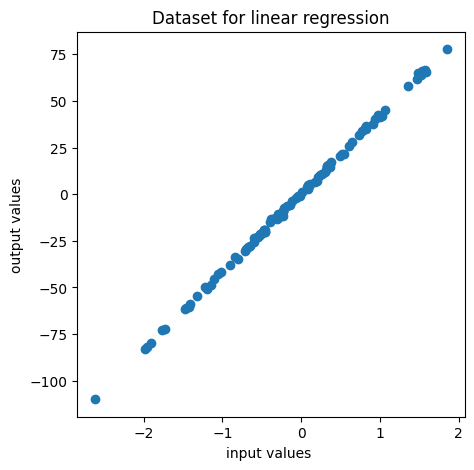

In [4]:
#lets plot our initial dataset
plt.figure(figsize=(5,5))
plt.scatter(X,y)
plt.title("Dataset for linear regression")
plt.xlabel("input values ")
plt.ylabel("output values")

In [5]:
# making a train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Size of train set = {X_train.shape} | Size of test set = {X_test.shape}")

Size of train set = (80, 1) | Size of test set = (20, 1)


# plan
*  main train function
* loss function
* prediction function i.e neuron
* random weight initialization
* gradient adjust

In [6]:
#updates weights and bias
def update(W,b,learning_rate,residual,X_train):
  m=X_train.shape[0]
  dW=(1/m)*np.dot(X_train.T,residual)
  db=(1/m)*np.sum(residual)
  W=W-learning_rate*dW
  b=b-learning_rate*db
  return W,b

In [7]:
# calculates squared loss
def loss_fn(y_prediction,y_target):
  m=y_prediction.shape[0]
  return (1/m)*np.sum((y_prediction - y_target)**2)

In [8]:
def predict(X_train,W,b):
  return np.dot(X_train,W)+b

  0%|          | 0/500 [00:00<?, ?it/s]

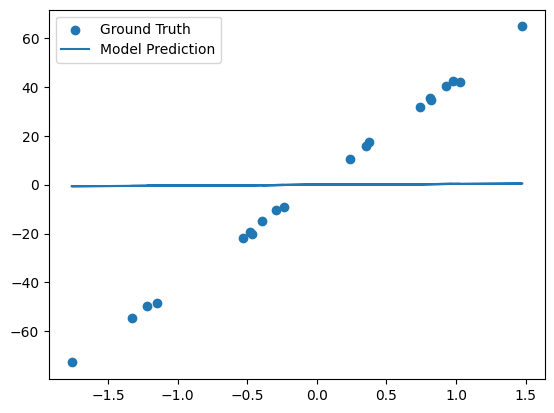

  0%|          | 1/500 [00:00<07:08,  1.16it/s]

iteration : 0 | train error : 1468.663
iteration : 20 | train error : 1044.778
iteration : 40 | train error : 745.491
iteration : 60 | train error : 533.475
iteration : 80 | train error : 382.805
iteration : 100 | train error : 275.410
iteration : 120 | train error : 198.644
iteration : 140 | train error : 143.626
iteration : 160 | train error : 104.098
iteration : 180 | train error : 75.634


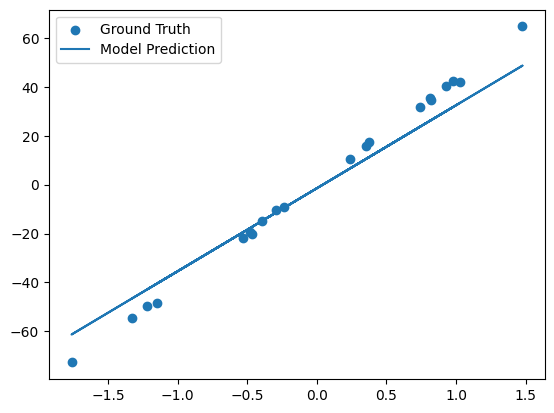

 40%|████      | 201/500 [00:01<00:01, 231.98it/s]

iteration : 200 | train error : 55.093
iteration : 220 | train error : 40.242
iteration : 240 | train error : 29.485
iteration : 260 | train error : 21.681
iteration : 280 | train error : 16.011
iteration : 300 | train error : 11.886
iteration : 320 | train error : 8.881
iteration : 340 | train error : 6.691
iteration : 360 | train error : 5.091
iteration : 380 | train error : 3.923


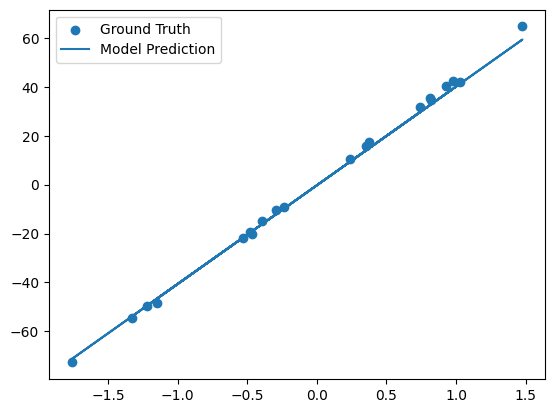

100%|██████████| 500/500 [00:01<00:00, 339.56it/s]

iteration : 400 | train error : 3.069
iteration : 420 | train error : 2.444
iteration : 440 | train error : 1.987
iteration : 460 | train error : 1.652
iteration : 480 | train error : 1.406


In [30]:
epochs=500
loss=0

# initializig the paramatrs
W=np.zeros(X_train.shape[1])
b=0
learning_rate=0.01

for epoch in tqdm(range(epochs)):
  # makes initial prdiction
  prediction=predict(X_train,W,b)
  residual=np.subtract(prediction,y_train)
  # calculates loss on the tain dataset
  loss=loss_fn(prediction,y_train)
  # update weights and bias
  W,b=update(W,b,learning_rate,residual,X_train)
  if epoch%200==0:
    test_predictions=predict(X_test,W,b)
    plt.scatter(X_test[:, 0], y_test, label="Ground Truth")
    plt.plot(X_test[:, 0], test_predictions, label="Model Prediction")
    plt.legend()
    plt.show()
  if epoch%20==0:
    print(f"iteration : {epoch} | train error : {loss:.3f}")
    print("="*80)


In [36]:
print(f"final values of Weight 'W' is {W} and the final value of bias is {b:.4f} ")

final values of Weight 'W' is [41.24611302] and the final value of bias is 0.0075 
